In [525]:
#Part I. Exploratory Data Analysis

In [526]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from scipy.stats import skew
from sklearn.preprocessing import OneHotEncoder

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from bayes_opt import BayesianOptimization

data_path = "C:/Users/armcl/Python/ultimate_challenge/" #Home

with open(data_path + 'logins.json') as f:
  logins = json.load(f)

#print(logins['login_time'])

In [527]:
logins_df = pd.DataFrame(logins)
logins_df['login_time']= pd.to_datetime(logins_df['login_time'])
logins_df.sort_values(by='login_time', inplace=True)
logins_df['count'] = 1

logins_df['time'] = logins_df['login_time'].dt.time

logins_df.set_index('login_time', inplace=True)

logins_df.head(10)

,count,time
login_time,,
1970-01-01 20:12:16,1,20:12:16
1970-01-01 20:13:18,1,20:13:18
1970-01-01 20:16:10,1,20:16:10
1970-01-01 20:16:36,1,20:16:36
1970-01-01 20:16:37,1,20:16:37
1970-01-01 20:21:41,1,20:21:41
1970-01-01 20:26:05,1,20:26:05
1970-01-01 20:26:21,1,20:26:21
1970-01-01 20:31:03,1,20:31:03


In [528]:
agg_logins = logins_df.resample("15T").sum()
agg_logins.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


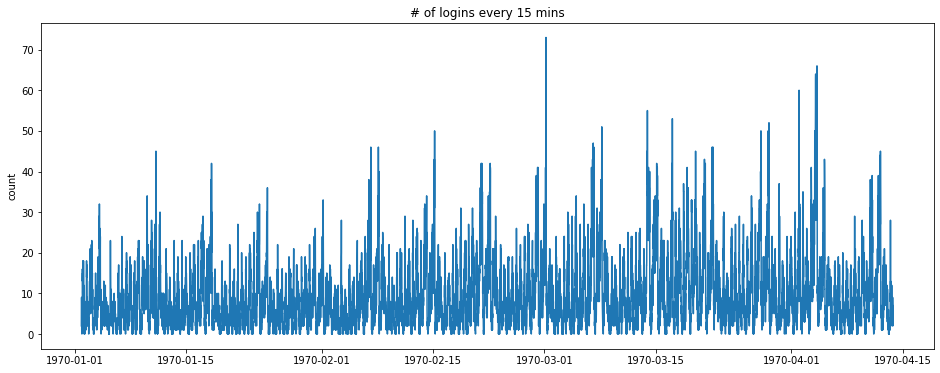

In [529]:
#This is not the most informative chart but does show some seasonality

plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=agg_logins.index, y="count", data=agg_logins)
ax.set_xlabel('')
ax.set_title("# of logins every 15 mins")
plt.show()

In [530]:
#Daily average for every 15 mins 

agg_logins['Week_Day'] = [val.weekday() for val in agg_logins.index]
agg_logins['Month'] = [val.month for val in agg_logins.index]

agg_logins.index = pd.Series([val.time() for val in agg_logins.index])

#if holidays since it's very short time, ignore this
#cal = calendar()
#holidays = cal.holidays(start=agg_logins.index.min() - timedelta(days=1), end=agg_logins.index.max())
#agg_logins['Holiday'] = agg_logins.index.isin(holidays)

#Weekdays vs. Weekends
agg_logins_weekday = agg_logins[agg_logins['Week_Day'].isin([0,1,2,3,4])]
agg_logins_weekend = agg_logins[agg_logins['Week_Day'].isin([5,6])]

agg_logins_monday = agg_logins[agg_logins['Week_Day'].isin([0])]
agg_logins_tuesday = agg_logins[agg_logins['Week_Day'].isin([1])]
agg_logins_wednesday = agg_logins[agg_logins['Week_Day'].isin([2])]
agg_logins_thursday = agg_logins[agg_logins['Week_Day'].isin([3])]
agg_logins_friday = agg_logins[agg_logins['Week_Day'].isin([4])]
agg_logins_saturday = agg_logins[agg_logins['Week_Day'].isin([5])]
agg_logins_sunday = agg_logins[agg_logins['Week_Day'].isin([6])]

#Months
agg_logins_jan = agg_logins[agg_logins['Month'].isin([1])]
agg_logins_feb = agg_logins[agg_logins['Month'].isin([2])]
agg_logins_mar = agg_logins[agg_logins['Month'].isin([3])]
agg_logins_apr = agg_logins[agg_logins['Month'].isin([4])]

#agg_logins.head()

agg_logins_mean = agg_logins.groupby(agg_logins.index).mean()
agg_logins_weekday_mean = agg_logins_weekday.groupby(agg_logins_weekday.index).mean()
agg_logins_weekend_mean = agg_logins_weekend.groupby(agg_logins_weekend.index).mean()

agg_logins_monday_mean = agg_logins_monday.groupby(agg_logins_monday.index).mean()
agg_logins_tuesday_mean = agg_logins_tuesday.groupby(agg_logins_tuesday.index).mean()
agg_logins_wednesday_mean = agg_logins_wednesday.groupby(agg_logins_wednesday.index).mean()
agg_logins_thursday_mean = agg_logins_thursday.groupby(agg_logins_thursday.index).mean()
agg_logins_friday_mean = agg_logins_friday.groupby(agg_logins_friday.index).mean()
agg_logins_saturday_mean = agg_logins_saturday.groupby(agg_logins_saturday.index).mean()
agg_logins_sunday_mean = agg_logins_sunday.groupby(agg_logins_sunday.index).mean()

agg_logins_jan_mean = agg_logins_jan.groupby(agg_logins_jan.index).mean()
agg_logins_feb_mean = agg_logins_feb.groupby(agg_logins_feb.index).mean()
agg_logins_mar_mean = agg_logins_mar.groupby(agg_logins_mar.index).mean()
agg_logins_apr_mean = agg_logins_apr.groupby(agg_logins_apr.index).mean()


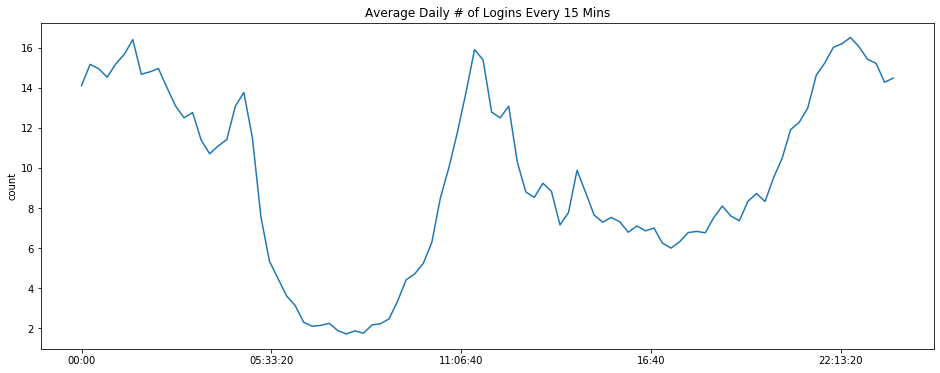

In [531]:
#At first, this is weird, why midnights so many demands?

plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=agg_logins_mean.index, y="count", data=agg_logins_mean)
#plt.xticks(agg_logins_mean.index, rotation=45)
ax.set_xlabel('')
ax.set_title("Average Daily # of Logins Every 15 Mins")
plt.show()

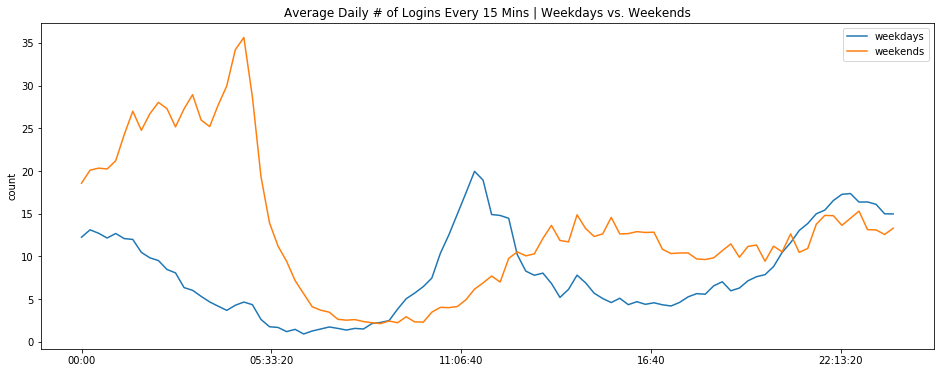

In [532]:
#The high demands during midnight are mostly driven by weekends

plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=agg_logins_weekday_mean.index, y="count", label = 'weekdays', data=agg_logins_weekday_mean)
ax = sns.lineplot(x=agg_logins_weekend_mean.index, y="count", label = 'weekends', data=agg_logins_weekend_mean)

#plt.xticks(agg_logins_mean.index, rotation=45)
ax.set_xlabel('')
ax.set_title("Average Daily # of Logins Every 15 Mins | Weekdays vs. Weekends")
plt.show()

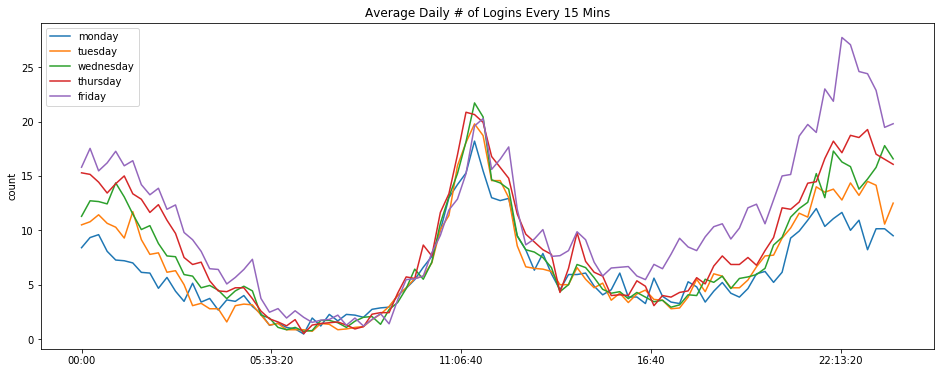

In [533]:
#Intersting, when the weekends get closer, there're more activities

plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=agg_logins_monday_mean.index, y="count", label='monday', data=agg_logins_monday_mean)
ax = sns.lineplot(x=agg_logins_tuesday_mean.index, y="count", label='tuesday', data=agg_logins_tuesday_mean)
ax = sns.lineplot(x=agg_logins_wednesday_mean.index, y="count", label='wednesday', data=agg_logins_wednesday_mean)
ax = sns.lineplot(x=agg_logins_thursday_mean.index, y="count", label='thursday', data=agg_logins_thursday_mean)
ax = sns.lineplot(x=agg_logins_friday_mean.index, y="count", label='friday', data=agg_logins_friday_mean)

#plt.xticks(agg_logins_mean.index, rotation=45)
ax.set_xlabel('')
ax.set_title("Average Daily # of Logins Every 15 Mins")
plt.show()

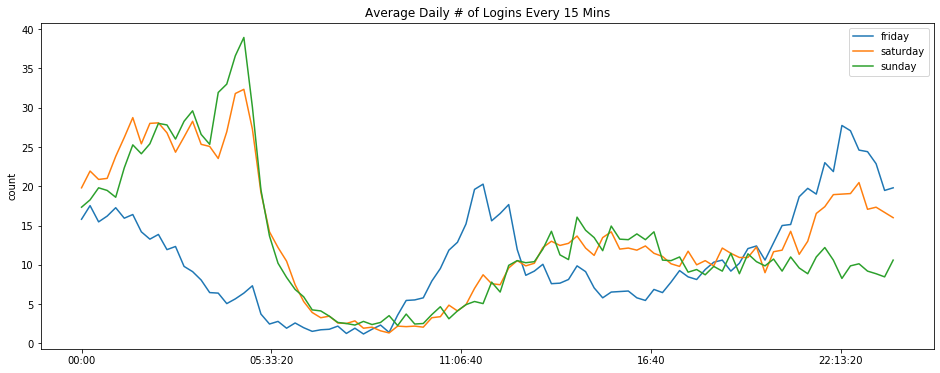

In [534]:
#Very intersting. party starts from Friday night and stops at Sunday night

plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=agg_logins_friday_mean.index, y="count", label='friday', data=agg_logins_friday_mean)
ax = sns.lineplot(x=agg_logins_saturday_mean.index, y="count", label='saturday', data=agg_logins_saturday_mean)
ax = sns.lineplot(x=agg_logins_sunday_mean.index, y="count", label='sunday', data=agg_logins_sunday_mean)

#plt.xticks(agg_logins_mean.index, rotation=45)
ax.set_xlabel('')
ax.set_title("Average Daily # of Logins Every 15 Mins")
plt.show()

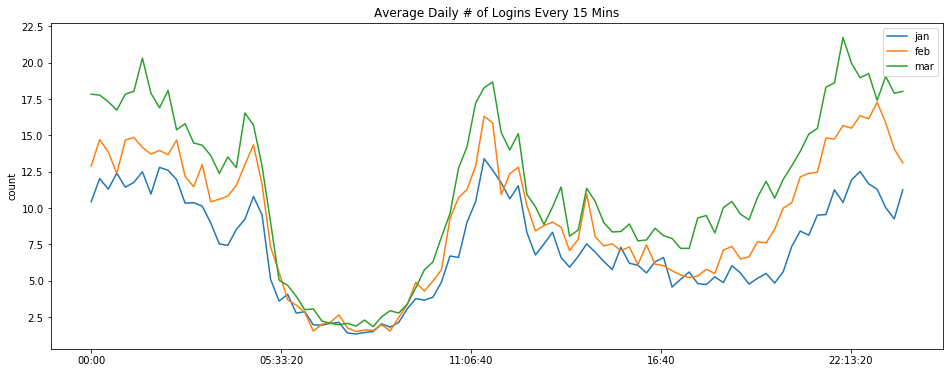

In [535]:
#Interesting, even with only 3 months of data, seems people use go out more when it's warmer

plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=agg_logins_jan_mean.index, y="count", label='jan', data=agg_logins_jan_mean)
ax = sns.lineplot(x=agg_logins_feb_mean.index, y="count", label='feb', data=agg_logins_feb_mean)
ax = sns.lineplot(x=agg_logins_mar_mean.index, y="count", label='mar', data=agg_logins_mar_mean)
#ax = sns.lineplot(x=agg_logins_apr_mean.index, y="count", label='apr', data=agg_logins_apr_mean)

#plt.xticks(agg_logins_mean.index, rotation=45)
ax.set_xlabel('')
ax.set_title("Average Daily # of Logins Every 15 Mins")
plt.show()

In [536]:
#Part 2 ‑ Experiment and metrics design

In [537]:
#Without the toll:
#Weekdays
#Gotham is most active at nights (residence/entertainment); 
#Metropolis is most active during the day (work)

#Weekends
#About the same pattern

#With the toll:
#Drivers don't go across the bridge

In [538]:
#Experiment Design

#Control: no reimbursements for tolls
#Treatment: with reimbusements for tolls

#Metrics: # of successful trips from between Gotham and Metropolis during the weekdays 
#Reasons: due to the tolls, drivers are reluctant to go across the bridge
#which lowers the supply in each city in different times especially during the weekdays
#and drivers may even cancel the trips if riders want to go to the other city
#and thus these reduce the # of trips between the two cities
#if the toll is reimbursed, we expect to see the # of successful trips between the two cities
#increase, especially during the weekdays

In [539]:
#Experiment Details

#Unit of Experiment
#Driver Id is not a good candidate because of potential interference issues
#namely, if a driver is assigned into the treatment group, meaning she gets a reiumbusement
#then the activity of her taking trips between the two cities will affact the # of trips
#taken by other drivers, no matter which groups are they assigned to.
#Interference leads to biased results. We can user coarser metrics like time.

#Independent Time Interval can be a good candidate. For example, in the 1st week,
#all drivers are in the control group and we measure the # of trips taken between the 2 cities
#Then next week, all drivers get the reimbursements, and we measure the metric again
#However, one thing to note is that because the experiment and metric don't have the same unit,
#the predictions tend to have a high variance.

#Experiment Population
#We can use the pupulation of drivers who travel between the 2 cities at least once in 
#the last 30 days as the pupulation for testing (to exclude drivers who never bother 
#going across the bridge and not relevant to this experiment)

#Sample Size
#Given the significance level (alpha), statistical power (1-beta), minimal effect size,
#the baseline metric value, we can calculate the sample size needed fot this experiment

#Match Covariates
#To make sure drivers in control and expriment are indifferentiable
#We want to include drivers who are taking trips in both the control and treatment groups

#Experiment 
#If the experiemtn groups's metric value is significantly higher than the control group's
#We can reject the null hypothesis which is there's no difference in terms of the metric
#at a pre-defined significance level for example 5%
#To test the significance, we can calculate it by the mean +- standard error*z-score

#Business Value
#Even if the # of successful trips between the two cities increase significantly
#in the treatment group compared to the control group
#We'll still want to calculate the business values
#For example, if the toll is $10 one way, and our expected profit from a trip between the 2 cities
#is $5, it doesn't make economic sense to reimbursement the tolls

In [540]:
#Part 3 ‑ Predictive modeling

In [541]:
data_path = "C:/Users/armcl/Python/ultimate_challenge/" #Home

with open(data_path + 'ultimate_data_challenge.json') as f:
  retention = json.load(f)


In [542]:
retention_df = pd.DataFrame(retention)

retention_df['signup_date']= pd.to_datetime(retention_df['signup_date'])
retention_df['last_trip_date']= pd.to_datetime(retention_df['last_trip_date'])

retention_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [543]:
retention_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [544]:
retention_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [545]:
#Use the last day of last_trip_date proxy the date when the data were pulled
pull_date = retention_df['last_trip_date'].max()

#if the last trip date is before one moenth earlier than the pull date, user is not active
retention_df['active'] = 1
retention_df.loc[(pull_date - retention_df['last_trip_date']).dt.days > 31, 'active'] = 0

retention_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [546]:
#38.45% of users are active

active_pct = (retention_df.groupby('active').size()/retention_df.groupby('active').size().sum()).to_frame(name = 'pct').reset_index()
active_pct
#plt.show()

,active,pct
0,0,0.61554
1,1,0.38446


In [547]:
retention_df.quantile([.0001, .1, .9, .9999])

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0.0001,0.000000,1.0,1.0,1.00,0.00,0.0000,0.0,0.0,0.0
0.1000,1.590000,4.4,4.0,1.00,0.00,0.0000,0.0,0.0,0.0
0.9000,13.110000,5.0,5.0,1.22,29.01,6.0000,1.0,100.0,1.0
0.9999,73.880325,5.0,5.0,5.00,100.00,56.0002,1.0,100.0,1.0


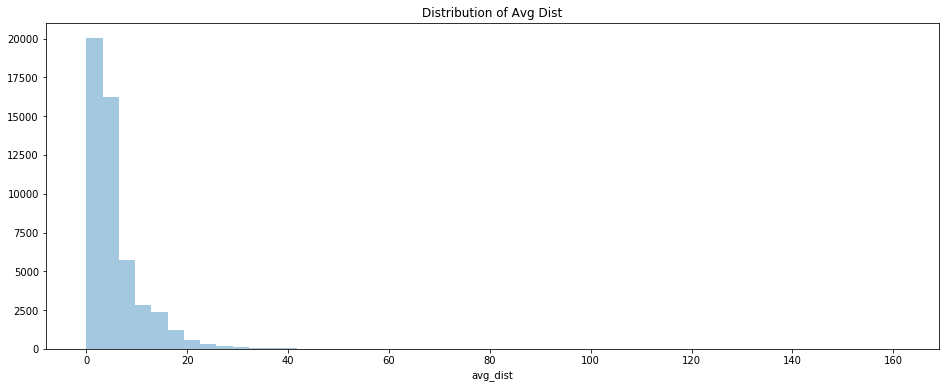

In [548]:
#Distribution of distance
plt.figure(figsize=(16, 6))
ax = sns.distplot(retention_df['avg_dist'], kde=False)
ax.set_title("Distribution of Avg Dist")

plt.show()

In [549]:
#Data Cleaning

#avg_dist 0 is a little weird
#either the trip is not comleted or the data collection is errornous
#remove them for now. there're 150 of them

retention_df = retention_df[retention_df['avg_dist']!=0]

In [550]:
#Missing Values
#For ratings by driver and to driver, fill the missing values with means

retention_df.loc[retention_df['avg_rating_by_driver'].isnull(),'avg_rating_by_driver'] = retention_df['avg_rating_by_driver'].mean()

retention_df.loc[retention_df['avg_rating_of_driver'].isnull(),'avg_rating_of_driver'] = retention_df['avg_rating_of_driver'].mean()

In [551]:
retention_df.loc[retention_df.ultimate_black_user == True,'ultimate_black_user'] = 1
retention_df.loc[retention_df.ultimate_black_user == False,'ultimate_black_user'] = 0

#Phone dummies

retention_df['phone'].fillna('phone_na',inplace=True)
retention_df = pd.concat([retention_df, retention_df['phone'].str.get_dummies()], axis=1)

#City dummies
retention_df = pd.concat([retention_df, retention_df['city'].str.get_dummies()], axis=1)

retention_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,Android,iPhone,phone_na,Astapor,King's Landing,Winterfell
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2,1,0,1,0,0,1,0
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,0,50.0,0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0,0,0,1,0,1,0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0,1,0,1,0,0,1,0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,0,82.4,0,1,0,0,0,0,1


In [552]:
retention_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49850 entries, 0 to 49999
Data columns (total 19 columns):
avg_dist                  49850 non-null float64
avg_rating_by_driver      49850 non-null float64
avg_rating_of_driver      49850 non-null float64
avg_surge                 49850 non-null float64
city                      49850 non-null object
last_trip_date            49850 non-null datetime64[ns]
phone                     49850 non-null object
signup_date               49850 non-null datetime64[ns]
surge_pct                 49850 non-null float64
trips_in_first_30_days    49850 non-null int64
ultimate_black_user       49850 non-null int64
weekday_pct               49850 non-null float64
active                    49850 non-null int64
Android                   49850 non-null int64
iPhone                    49850 non-null int64
phone_na                  49850 non-null int64
Astapor                   49850 non-null int64
King's Landing            49850 non-null int64
Winterfell   

In [553]:
retention_df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,Android,iPhone,phone_na,Astapor,King's Landing,Winterfell
count,49850.000000,49850.000000,49850.000000,49850.000000,49850.000000,49850.000000,49850.000000,49850.000000,49850.000000,49850.000000,49850.000000,49850.000000,49850.000000,49850.000000,49850.000000
mean,5.814269,4.779829,4.602299,1.074873,8.864128,2.283129,0.377874,60.940907,0.385296,0.300201,0.691876,0.007924,0.330832,0.202889,0.466279
std,5.707059,0.439083,0.563307,0.222325,19.958115,3.797218,0.484861,37.036305,0.486670,0.458350,0.461723,0.088663,0.470518,0.402154,0.498867
min,0.010000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.430000,4.700000,4.500000,1.000000,0.000000,0.000000,0.000000,33.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.900000,5.000000,4.800000,1.000000,0.000000,1.000000,0.000000,66.700000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,6.960000,5.000000,5.000000,1.050000,8.700000,3.000000,1.000000,100.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [554]:
#
retention_df = retention_df.drop(columns=['city','phone','last_trip_date','signup_date'])

retention_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active,Android,iPhone,phone_na,Astapor,King's Landing,Winterfell
0,3.67,5.0,4.7,1.10,15.4,4,1,46.2,1,0,1,0,0,1,0
1,8.26,5.0,5.0,1.00,0.0,0,0,50.0,0,1,0,0,1,0,0
2,0.77,5.0,4.3,1.00,0.0,3,0,100.0,0,0,1,0,1,0,0
3,2.36,4.9,4.6,1.14,20.0,9,1,80.0,1,0,1,0,0,1,0
4,3.13,4.9,4.4,1.19,11.8,14,0,82.4,0,1,0,0,0,0,1


In [555]:
#Data for logistic regression
#Drop exact related dummies

retention_lg = retention_df.drop(columns=['phone_na','Winterfell'])

target = ['active'] 
features = list(retention_lg.drop(['active'],axis=1).columns)
retention_lg[features] = scaler.fit_transform(retention_lg[features])

X = retention_lg[features]
y = retention_lg[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(34895, 12)
(14955, 12)


In [556]:
features

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'trips_in_first_30_days',
 'ultimate_black_user',
 'weekday_pct',
 'Android',
 'iPhone',
 'Astapor',
 "King's Landing"]

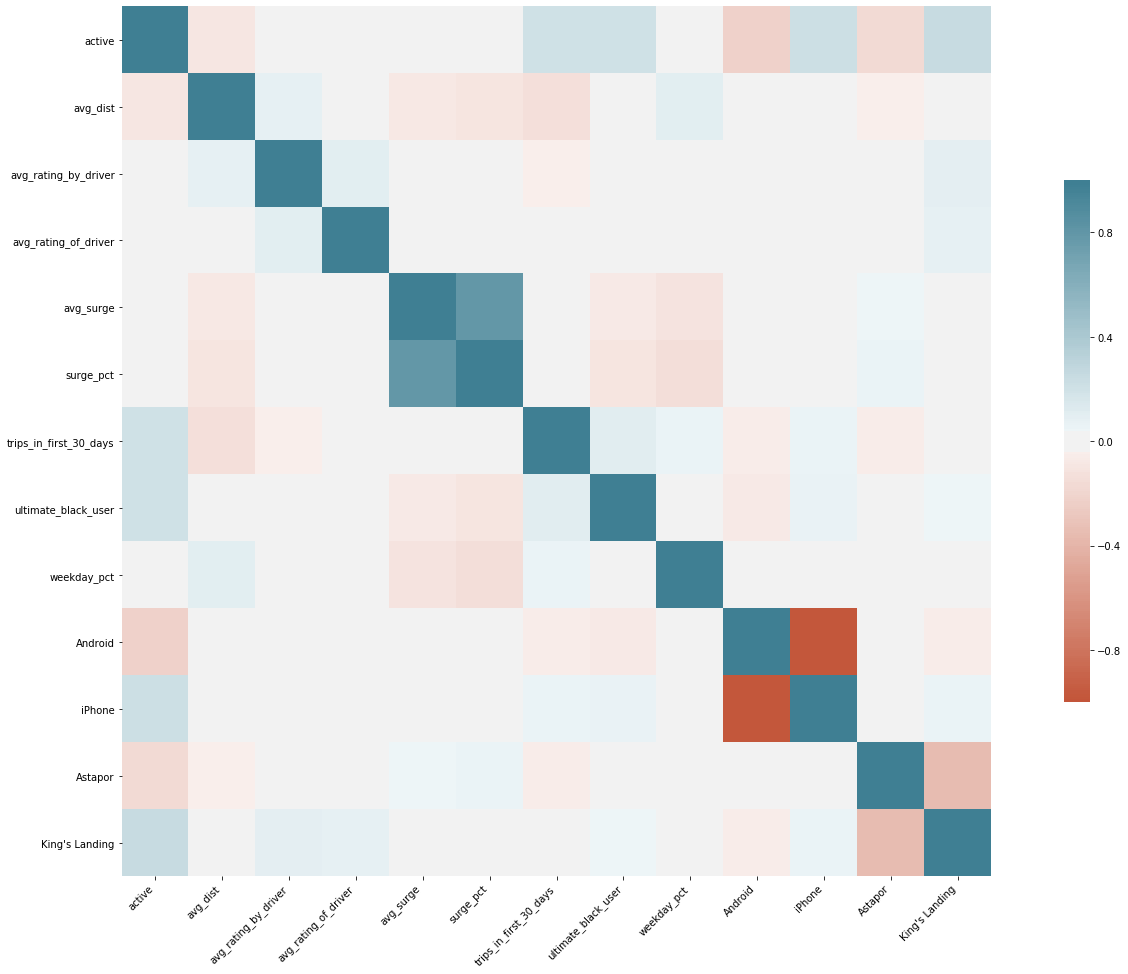

In [557]:
#Make a correlation heatmap
#Note that we only look at the training data when doing EDA here to avoid data snooping

#Seems avg_surge and surge % are highly correlated

training_data = pd.concat([y_train,X_train],axis=1)[target+features]

plt.figure(figsize=(26, 16))

corr = training_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, cbar=True,cbar_kws={"shrink": .6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [583]:
corr['active']

active                    1.000000
avg_dist                 -0.096262
avg_rating_by_driver     -0.024373
avg_rating_of_driver     -0.011138
avg_surge                -0.002987
surge_pct                 0.012091
trips_in_first_30_days    0.205531
ultimate_black_user       0.201595
weekday_pct               0.007194
Android                  -0.223571
iPhone                    0.223212
Astapor                  -0.170231
King's Landing            0.256959
Name: active, dtype: float64

In [558]:
#Use the selected features and run the model

#Since average surge and surge pct are highly correlated, remove one
#avg surge is more informative than surge pct so let's drop surge pct
features.remove('avg_surge')

X = retention_lg[features]
y = retention_lg[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#Use p-value to find the significance of variables
logit_model=sm.Logit(y,X)

result=logit_model.fit()

print(result.summary2())

C:\Users\armcl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization terminated successfully.
         Current function value: 0.593880
         Iterations 6
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.109     
Dependent Variable:   active             AIC:                59231.8616
Date:                 2020-03-26 22:35   BIC:                59328.8461
No. Observations:     49850              Log-Likelihood:     -29605.   
Df Model:             10                 LL-Null:            -33230.   
Df Residuals:         49839              LLR p-value:        0.0000    
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
avg_dist               -0.1801   0.0108 -16.7317 0.0000 -0.2012

In [559]:
#weekday_pct is not significant with 5% significance level, drop it

features.remove('weekday_pct')

X = retention_lg[features]
y = retention_lg[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#Use p-value to find the significance of variables
logit_model=sm.Logit(y,X)

result=logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.593916
         Iterations 6
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.109     
Dependent Variable:   active             AIC:                59233.4546
Date:                 2020-03-26 22:35   BIC:                59321.6223
No. Observations:     49850              Log-Likelihood:     -29607.   
Df Model:             9                  LL-Null:            -33230.   
Df Residuals:         49840              LLR p-value:        0.0000    
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
avg_dist               -0.1821   0.0107 -16.9935 0.0000 -0.2031

C:\Users\armcl\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


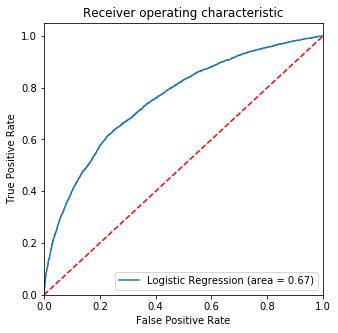

In [560]:

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1]) #predicted probability of cancellation
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve')

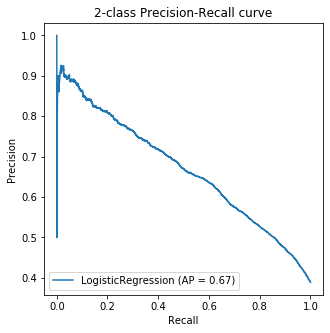

In [561]:
disp = plot_precision_recall_curve(logreg, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve')

In [562]:
#Use threshold 0.4 when the precision recall and f1 scores are close to each other 0.63
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]
y_scores = logreg.predict_proba(X_test)[:,1]

y_pred_adj = adjusted_classes(y_scores, 0.4)

print(classification_report(y_test, y_pred_adj))


              precision    recall  f1-score   support

           0       0.76      0.75      0.76      9142
           1       0.62      0.64      0.63      5813

    accuracy                           0.70     14955
   macro avg       0.69      0.69      0.69     14955
weighted avg       0.71      0.70      0.71     14955



In [563]:
print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                   columns=['pred_neg', 'pred_pos'], 
                   index=['neg', 'pos']))

     pred_neg  pred_pos
neg      6823      2319
pos      2104      3709


In [564]:
print('Accuracy score = ',metrics.accuracy_score(y_test, y_pred_adj))
print('Precision = ',metrics.precision_score(y_test, y_pred_adj))
print('Recall = ',metrics.recall_score(y_test, y_pred_adj))
print('F1 score = ',metrics.f1_score(y_test, y_pred_adj))

Accuracy score =  0.7042460715479772
Precision =  0.6152952886529529
Recall =  0.6380526406330638
F1 score =  0.6264673591757453


In [565]:
#Let's try a random forest model
#Create a Gaussian Classifier

target = ['active'] 
features_rf = list(retention_df.drop(['active'],axis=1).columns)

rf=RandomForestClassifier(n_estimators=100, random_state = 42, 
                                max_depth = 5) #number of trees in the forest

X_rf = retention_df[features_rf]
y_rf = retention_df[target]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.30, random_state=40)
print(X_train_rf.shape); print(X_test_rf.shape)

rf.fit(X_train_rf, y_train_rf)

y_pred_rf = rf.predict(X_test_rf)

feature_imp = pd.Series(rf.feature_importances_,index=features_rf).sort_values(ascending=False)
feature_imp

(34895, 14)
(14955, 14)


C:\Users\armcl\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


avg_rating_by_driver      0.229014
King's Landing            0.146993
surge_pct                 0.130303
weekday_pct               0.120079
avg_surge                 0.101550
iPhone                    0.063283
Android                   0.062812
ultimate_black_user       0.052237
trips_in_first_30_days    0.040109
Astapor                   0.028591
Winterfell                0.009374
avg_dist                  0.008695
avg_rating_of_driver      0.006850
phone_na                  0.000111
dtype: float64

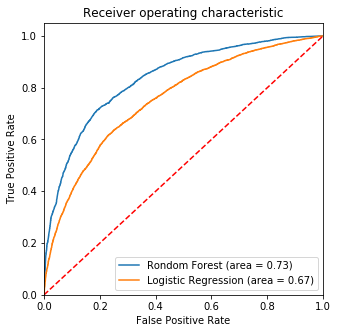

In [566]:
#Comparing AUC, random forest is better than logistic in this case

logit_roc_auc_rf = roc_auc_score(y_test_rf, rf.predict(X_test_rf))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, rf.predict_proba(X_test_rf)[:,1]) #predicted probability of cancellation
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Rondom Forest (area = %0.2f)' % logit_roc_auc_rf)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [567]:
#Random Search Hyper parameter fine tuning


# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf=RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42)

## Perform RandomizedSearchCV
#randomized_roc_auc = RandomizedSearchCV(estimator=rf,
#                                        param_distributions=rf_param_grid,
#                                        n_iter=2, scoring='roc_auc', cv=3, verbose=1)

## Fit the estimator
#randomized_roc_auc.fit(X_rf, y_rf)

## Compute metrics
#print(randomized_roc_auc.best_score_)
#print(randomized_roc_auc.best_estimator_)

In [568]:
#Let's try a random forest model
#Create a Gaussian Classifier

target = ['active'] 
features_rf = list(retention_df.drop(['active'],axis=1).columns)

rf=RandomForestClassifier(n_estimators=1000, random_state = 42, min_samples_leaf=2, 
                                min_samples_split=10,max_depth = 5) 

X_rf = retention_df[features_rf]
y_rf = retention_df[target]

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.30, random_state=40)
print(X_train_rf.shape); print(X_test_rf.shape)

rf.fit(X_train_rf, y_train_rf)

y_pred_rf = rf.predict(X_test_rf)

feature_imp = pd.Series(rf.feature_importances_,index=features_rf).sort_values(ascending=False)
feature_imp

(34895, 14)
(14955, 14)


C:\Users\armcl\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


avg_rating_by_driver      0.212757
surge_pct                 0.152572
King's Landing            0.137413
avg_surge                 0.120587
weekday_pct               0.110228
Android                   0.062338
iPhone                    0.056326
ultimate_black_user       0.052619
trips_in_first_30_days    0.045398
Astapor                   0.026826
Winterfell                0.009871
avg_dist                  0.007184
avg_rating_of_driver      0.005700
phone_na                  0.000180
dtype: float64

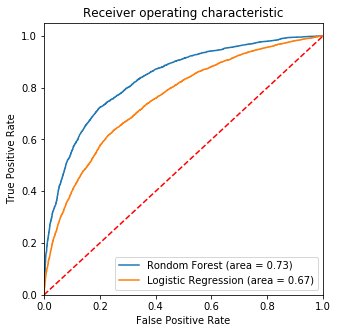

In [569]:
#Comparing AUC, random forest is better than logistic in this case

logit_roc_auc_rf = roc_auc_score(y_test_rf, rf.predict(X_test_rf))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, rf.predict_proba(X_test_rf)[:,1]) #predicted probability of cancellation
plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Rondom Forest (area = %0.2f)' % logit_roc_auc_rf)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve')

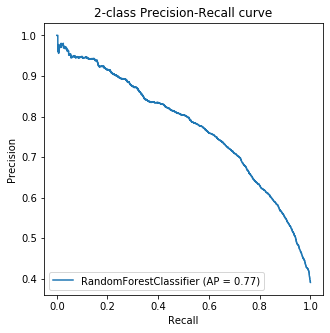

In [570]:
#The average precision is higher than logistic regression
disp_rf = plot_precision_recall_curve(rf, X_test_rf, y_test_rf)
disp_rf.ax_.set_title('2-class Precision-Recall curve')

In [571]:
#Use threshold 0.43 when the precision recall and f1 scores are close to each other 0.71
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

y_scores_rf = rf.predict_proba(X_test_rf)[:,1]

y_pred_adj_rf = adjusted_classes(y_scores_rf, 0.43)

print(classification_report(y_test_rf, y_pred_adj_rf))


              precision    recall  f1-score   support

           0       0.81      0.82      0.81      9142
           1       0.71      0.70      0.71      5813

    accuracy                           0.77     14955
   macro avg       0.76      0.76      0.76     14955
weighted avg       0.77      0.77      0.77     14955



In [572]:
print(pd.DataFrame(confusion_matrix(y_test_rf, y_pred_adj_rf),
                   columns=['pred_neg', 'pred_pos'], 
                   index=['neg', 'pos']))

     pred_neg  pred_pos
neg      7474      1668
pos      1740      4073


In [573]:
print('Accuracy score = ',metrics.accuracy_score(y_test_rf, y_pred_adj_rf))
print('Precision = ',metrics.precision_score(y_test_rf, y_pred_adj_rf))
print('Recall = ',metrics.recall_score(y_test_rf, y_pred_adj_rf))
print('F1 score = ',metrics.f1_score(y_test_rf, y_pred_adj_rf))

Accuracy score =  0.7721163490471414
Precision =  0.7094582825291761
Recall =  0.7006709100292448
F1 score =  0.7050372165483815


C:\Users\armcl\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\armcl\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


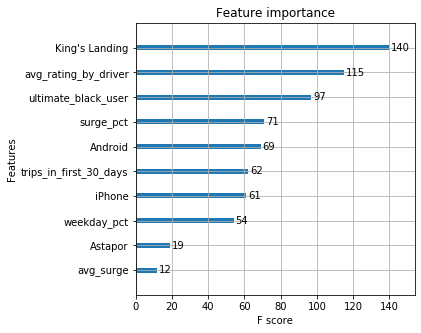

In [574]:
#Try XGBOOST

features_xgb = list(retention_df.drop(['active'],axis=1).columns)

X_xgb = retention_df[features_xgb]
y_xgb = retention_df[target]

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.30, random_state=40)

xgboost = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.8, 
                            learning_rate = 0.01, max_depth = 3, gamma = 1, 
                            n_estimators = 100)

xgboost.fit(X_train_xgb,y_train_xgb)

y_pred_xgb = xgboost.predict(X_test_xgb)

xgb.plot_importance(xgboost)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

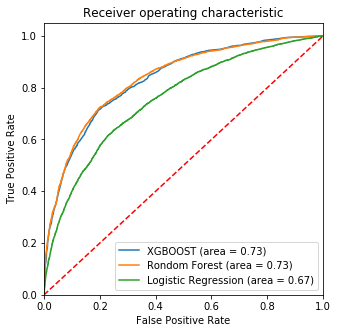

In [575]:
#Comparing AUC, random forest is better than logistic in this case

logit_roc_auc_xgb = roc_auc_score(y_test_xgb, xgboost.predict(X_test_xgb))
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_xgb, xgboost.predict_proba(X_test_xgb)[:,1]) #predicted probability of cancellation
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='XGBOOST (area = %0.2f)' % logit_roc_auc_xgb)
plt.plot(fpr_rf, tpr_rf, label='Rondom Forest (area = %0.2f)' % logit_roc_auc_rf)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [576]:
#Random Search Hyper parameter fine tuning

# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(.05, 1, .05),
    'clf__max_depth': np.arange(3,10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

xgboost = xgb.XGBClassifier()
    
# Perform RandomizedSearchCV
randomized_roc_auc = RandomizedSearchCV(estimator=xgboost,
                                        param_distributions=gbm_param_grid,
                                        n_iter=2, scoring='roc_auc', cv=3, verbose=1)

# Fit the estimator
randomized_roc_auc.fit(X_xgb, y_xgb)

# Compute metrics
print(randomized_roc_auc.best_score_)
print(randomized_roc_auc.best_estimator_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\armcl\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\armcl\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\armcl\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\armcl\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-

0.8547700824537044
XGBClassifier(base_score=0.5, booster=None, clf__learning_rate=0.5,
              clf__max_depth=3, clf__n_estimators=150, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


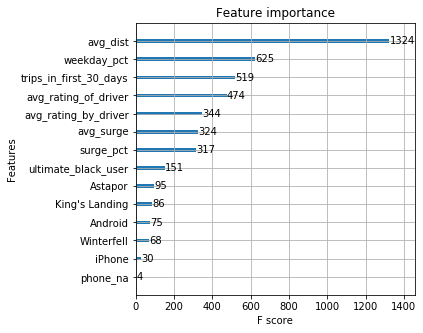

In [581]:

features_xgb = list(retention_df.drop(['active'],axis=1).columns)

X_xgb = retention_df[features_xgb]
y_xgb = retention_df[target]

X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size=0.30, random_state=40)

xgboost = xgb.XGBClassifier(base_score=0.5, booster=None, clf__learning_rate=0.8,
              clf__max_depth=7, clf__n_estimators=50, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

xgboost.fit(X_train_xgb,y_train_xgb)

y_pred_xgb = xgboost.predict(X_test_xgb)

xgb.plot_importance(xgboost,importance_type='weight')
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

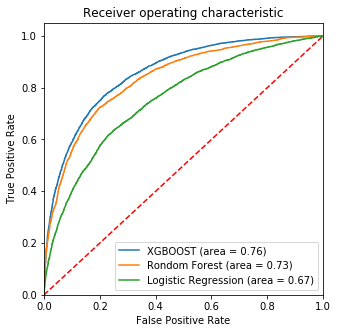

In [578]:
#After fine tuning, XGBOOST improves AUC a bit more

logit_roc_auc_xgb = roc_auc_score(y_test_xgb, xgboost.predict(X_test_xgb))
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_xgb, xgboost.predict_proba(X_test_xgb)[:,1]) #predicted probability of cancellation
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label='XGBOOST (area = %0.2f)' % logit_roc_auc_xgb)
plt.plot(fpr_rf, tpr_rf, label='Rondom Forest (area = %0.2f)' % logit_roc_auc_rf)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [579]:
del logins_df
del retention_df

In [ ]:
#The two features that are important and are actionable are:
#1) trips_in_first_30_days
#2 ultimate_black_user

#Both are positively reclated to the log odds of being an active user
#After users sign up, we can encorage them to:
#1) try at least one trip in the first 30 days possibly by giving coupons and or compaigns
#2) try the black service by again providing promotions 
#so the user has a chance to test and like the service
#which leads to higher adoption rate later on